In [1]:
import yfinance as yf
import pandas as pd
import datetime
from prophet import Prophet

/Users/andrejmironov/opt/anaconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


 Использую библиотеки yafinance для формирования выборки

In [2]:
end_365 = datetime.date.today() + datetime.timedelta(days=1)
start_365 = end_365 - datetime.timedelta(days=365)

data = yf.download("EURRUB=X", start = start_365.isoformat(), end = end_365.isoformat())


[*********************100%***********************]  1 of 1 completed


In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-06 00:00:00+01:00,83.836098,84.013603,83.502998,83.860901,83.860901,0
2021-10-07 00:00:00+01:00,83.691101,83.752197,82.869400,83.687897,83.687897,0
2021-10-08 00:00:00+01:00,83.030998,83.308998,82.827499,83.010498,83.010498,0
2021-10-11 00:00:00+01:00,83.136703,83.212097,82.737000,82.993698,82.993698,0
2021-10-12 00:00:00+01:00,83.080299,83.156998,82.833199,83.065201,83.065201,0


In [4]:
data = data.reset_index()
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-06 00:00:00+01:00,83.836098,84.013603,83.502998,83.860901,83.860901,0
1,2021-10-07 00:00:00+01:00,83.691101,83.752197,82.869400,83.687897,83.687897,0
2,2021-10-08 00:00:00+01:00,83.030998,83.308998,82.827499,83.010498,83.010498,0
3,2021-10-11 00:00:00+01:00,83.136703,83.212097,82.737000,82.993698,82.993698,0
4,2021-10-12 00:00:00+01:00,83.080299,83.156998,82.833199,83.065201,83.065201,0


In [5]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data['ds'] = pd.to_datetime(data['Date']).dt.date.astype('datetime64[ns]')
data['y'] = (data.High + data.Low)/2

In [7]:
df = data[['ds','y']]
df.head()

,ds,y
0,2021-10-06,83.758301
1,2021-10-07,83.310799
2,2021-10-08,83.068249
3,2021-10-11,82.974548
4,2021-10-12,82.995098


In [8]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -4.05345


/Users/andrejmironov/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        510.43   0.000957347       102.226   7.616e-06       0.001      156  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       511.737    0.00049476       66.2496   8.321e-06       0.001      240  LS failed, Hessian reset 
     199       512.181    0.00473636       65.6721      0.8625      0.8625      319   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     206       512.465    0.00116983       107.971   1.482e-05       0.001      376  LS failed, Hessian reset 
     299       513.036   4.48412e-07       52.6753       0.359           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       513.049   1.48481e-07         73.53      0.3212      0.3212      650   
    Iter      log prob        ||dx||  

In [11]:
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
256,2022-09-29
257,2022-09-30
258,2022-10-03
259,2022-10-04
260,2022-10-05


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

/Users/andrejmironov/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/Users/andrejmironov/opt/anaconda3/envs/py38/lib/python3.8/site-packages/prophet/forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,yhat,yhat_lower,yhat_upper
256,2022-09-29,56.312727,43.190936,68.895300
257,2022-09-30,56.185928,43.953861,68.293675
258,2022-10-03,56.816405,43.909486,69.488340
259,2022-10-04,56.410198,43.902997,68.384931
260,2022-10-05,56.041162,43.958574,68.149845


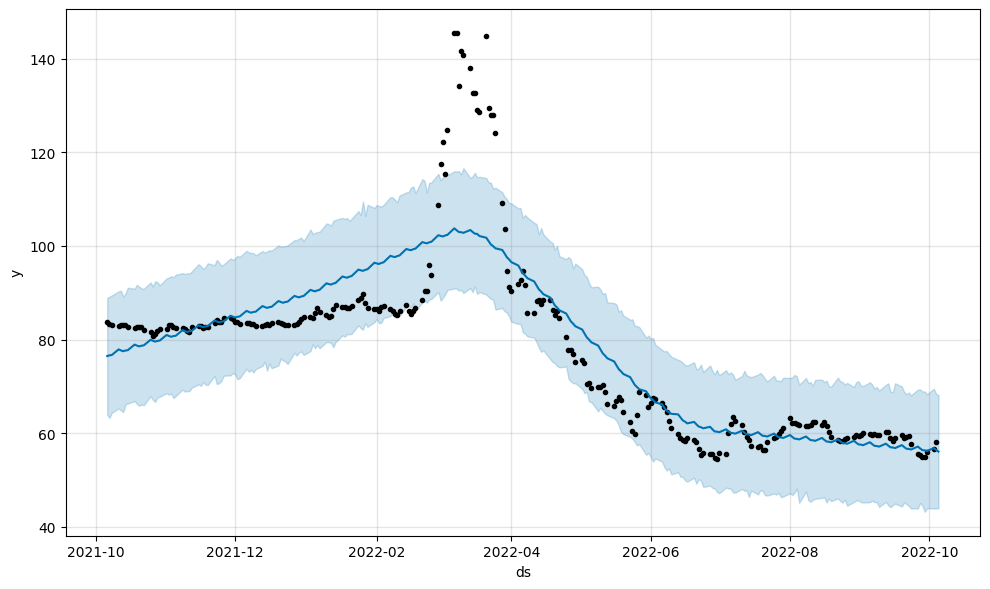

In [13]:
fig1 = m.plot(forecast)